## HR Analytics Project- Understanding the Attrition in HR

Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Dataset Link

https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score, auc

from sklearn.model_selection import cross_val_score

## Data Collection

In [2]:
HR_df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
HR_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Exploratory Data Analysis

In [3]:
HR_df.shape

(1470, 35)

In [4]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
HR_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
HR_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observation:
            1. No Null values

In [7]:
HR_df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

## check for any blank records

In [8]:
for i in HR_df.columns:
    print(HR_df.loc[HR_df[i] == ' '])

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfac

Observation:
            1. checked all 35 columns but none have any blank values

## check the duplicate values in rows

In [9]:
HR_df.shape

(1470, 35)

In [10]:
HR_df.duplicated().sum()

0

In [11]:
HR_df.shape

(1470, 35)

Observation:
            1. No duplicate values in any of the rows.

## Number of uniques values in each column

In [12]:
HR_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [13]:
HR_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. There are huge difference betwen 75% and max and hence looks like there are quite 
                more number of outliers

In [14]:
HR_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
# check the value counts of each column

for i in HR_df.columns:
    print(HR_df[i].value_counts())
    print('\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

## Data Visualization

In [16]:
HR_df.shape

(1470, 35)

In [17]:
# seperating numerical and categorical columns

cat_col = []
for i in HR_df.dtypes.index:
    if HR_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in HR_df.dtypes.index:
    if HR_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Numerical Column ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


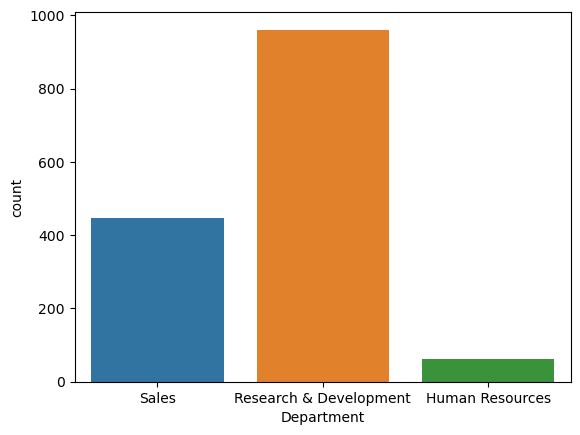

In [18]:
# Univariate Analysis

sns.countplot(x = 'Department', data = HR_df)
print(HR_df.Department.value_counts())

Observation:
            1. The Research & Development department has more number of employees - 961

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


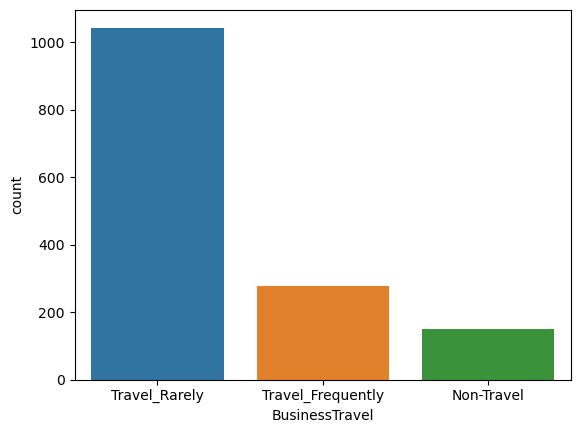

In [19]:
# Univariate Analysis

sns.countplot(x = 'BusinessTravel', data = HR_df)
print(HR_df.BusinessTravel.value_counts())

Observation:
            1. For the business who travel rarely has more number of employees - 1043

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


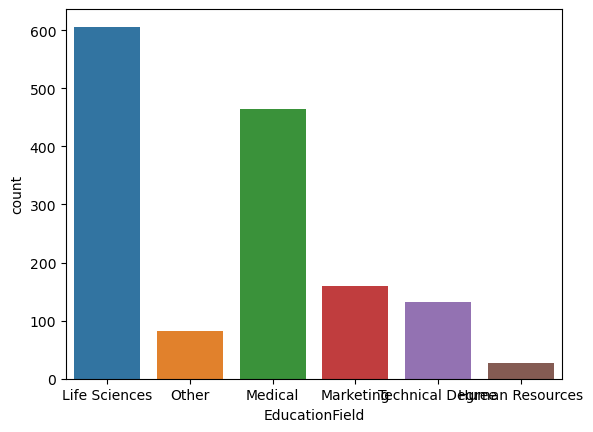

In [20]:
# Univariate Analysis

sns.countplot(x = 'EducationField', data = HR_df)
print(HR_df.EducationField.value_counts())

Observation:
            1. The employees who have Life Sciences education are more compared to other field - 606

Male      882
Female    588
Name: Gender, dtype: int64


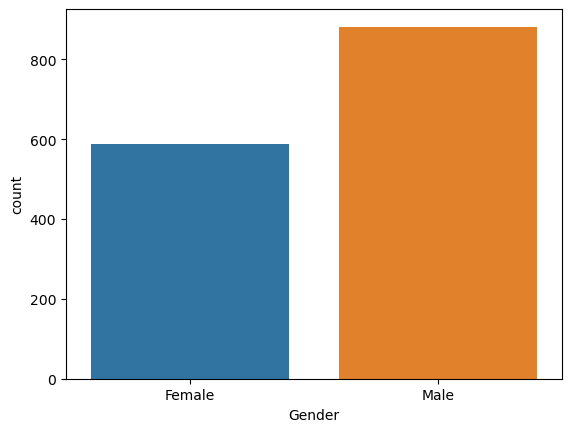

In [21]:
# Univariate Analysis

sns.countplot(x = 'Gender', data = HR_df)
print(HR_df.Gender.value_counts())

Observation:
            1. More number of Male employees - 882

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


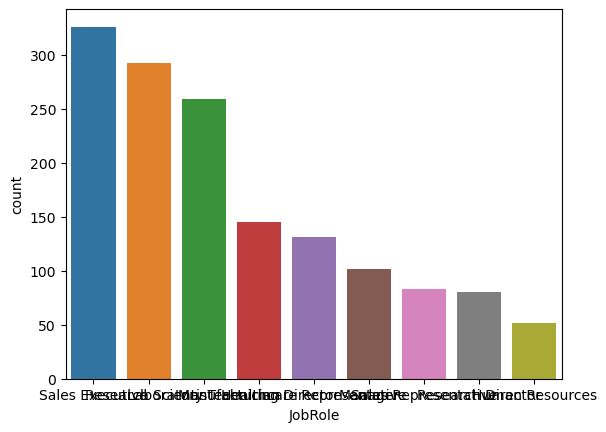

In [22]:
# Univariate Analysis

sns.countplot(x = 'JobRole', data = HR_df)
print(HR_df.JobRole.value_counts())

Observation:
            1. More number of Sales Executive - 326

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


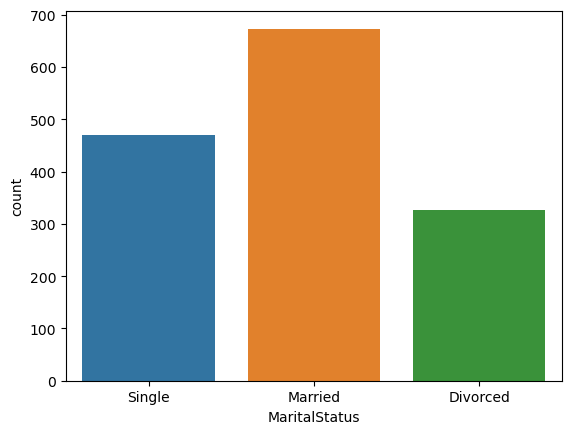

In [23]:
# Univariate Analysis

sns.countplot(x = 'MaritalStatus', data = HR_df)
print(HR_df.MaritalStatus.value_counts())

In [ ]:
Observation:
            1. More number of Married employees - 673

Y    1470
Name: Over18, dtype: int64


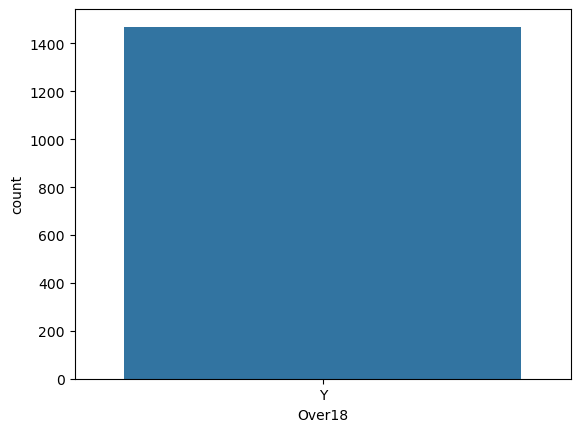

In [24]:
# Univariate Analysis

sns.countplot(x = 'Over18', data = HR_df)
print(HR_df.Over18.value_counts())

Observation:
            1. As all the employees are over18 - 1470
            2. Total number of samples are 1470
            3. We can drop this column

No     1054
Yes     416
Name: OverTime, dtype: int64


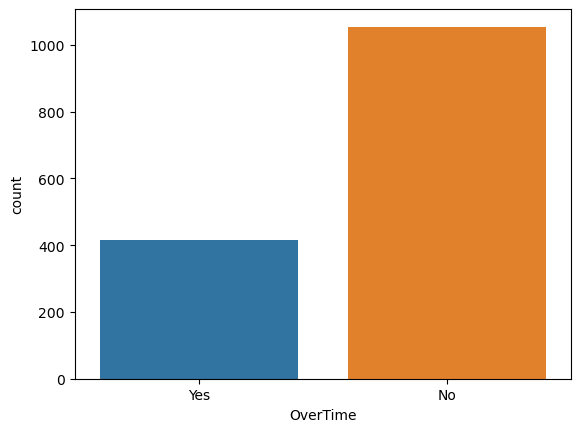

In [25]:
# Univariate Analysis

sns.countplot(x = 'OverTime', data = HR_df)
print(HR_df.OverTime.value_counts())

Observation:
            1. More number of employees does not work OverTime - 1054

No     1233
Yes     237
Name: Attrition, dtype: int64


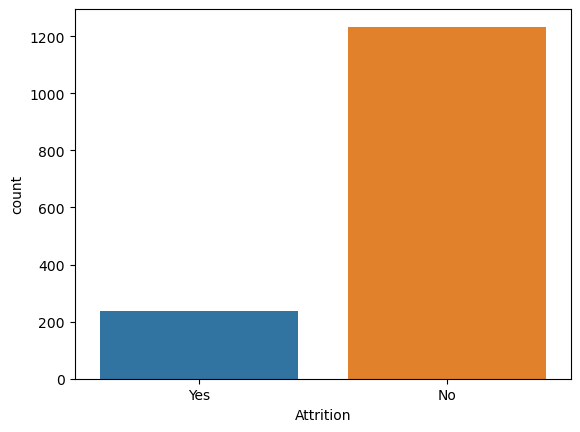

In [26]:
# Univariate Analysis

sns.countplot(x = 'Attrition', data = HR_df)
print(HR_df.Attrition.value_counts())

Observation:
            1. There are no gradual loss of employees overtime - 1233
            2. Data is imbalanced, need to do data balancing. 

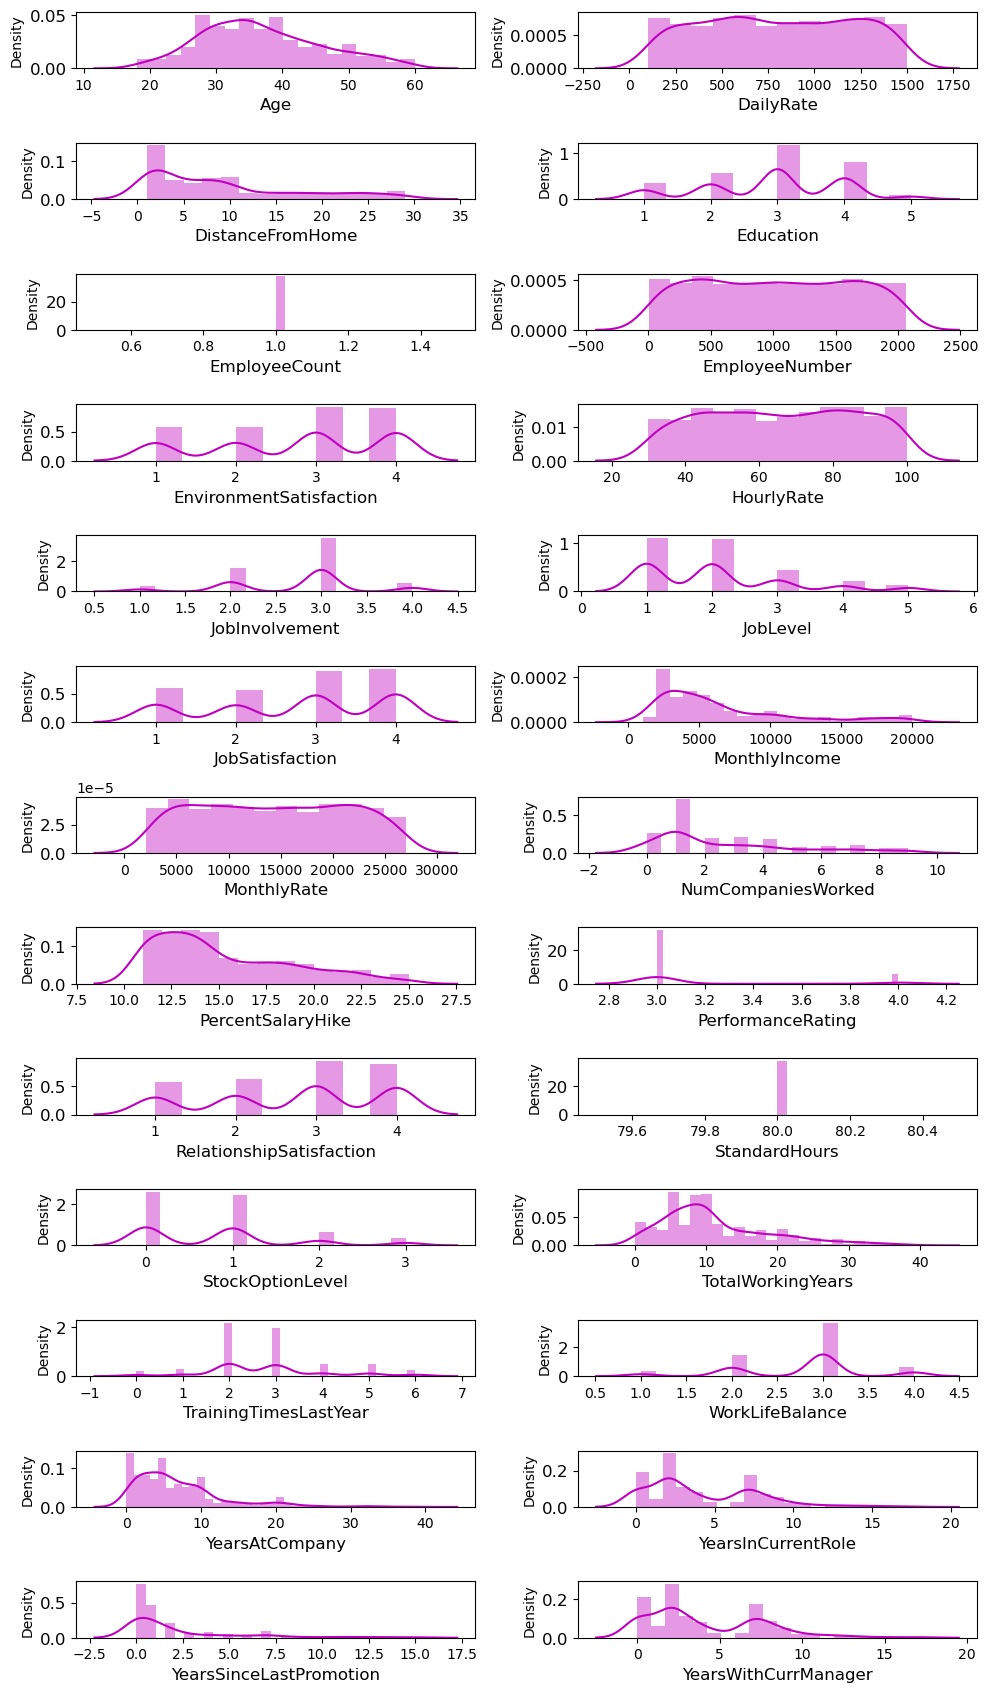

In [27]:
# lets see how data is distributed for each numerical column

plt.figure(figsize=(10, 17))
p = 1
for i in num_col:
    if p <= 26:
        ax = plt.subplot(13, 2, p)
        sns.distplot(HR_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. The continuous data like 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 
                'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                'YearsSinceLastPromotion', 'YearsWithCurrManager'are not well normally distributed. 
            2. There are outliers
            3. We need to deal with skewness in the data 

In [28]:
HR_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Drop columns which are not needed

In [29]:
HR_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
HR_df.shape

(1470, 35)

In [31]:
HR_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [32]:
# As decided in univariate analysis 'Over18' column not needed for prediction of "Attrition'
# other columns like Over18, EmployeeCount and StandardHours can be deleted as it has 
# single value and we cant do any prediction from this feature. And EmployeeNumber column not needed

HR_df.drop(["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"], axis = 1, inplace = True)

In [33]:
HR_df.shape

(1470, 31)

In [34]:
HR_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## Feature Encoding

In [35]:
# Convert Object data type to int type

HR_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [36]:
# seperating numerical and categorical columns

cat_col = []
for i in HR_df.dtypes.index:
    if HR_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in HR_df.dtypes.index:
    if HR_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


Numerical Column ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [37]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [38]:
for i in cat_col:
    HR_df[i] = label_enc.fit_transform(HR_df[i])

In [39]:
HR_df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

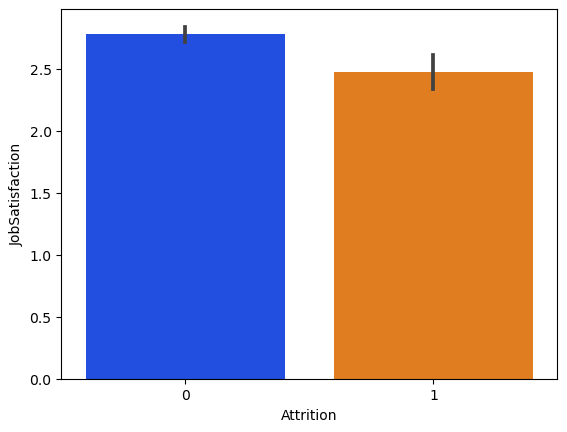

In [40]:
# plot Attrition v/s JobSatisfaction

sns.barplot(x = 'Attrition', y = 'JobSatisfaction', data = HR_df, palette = 'bright')

In [ ]:
Observation:
            1. There are no gradual loss of employees overtime with respect to JobSatisfaction

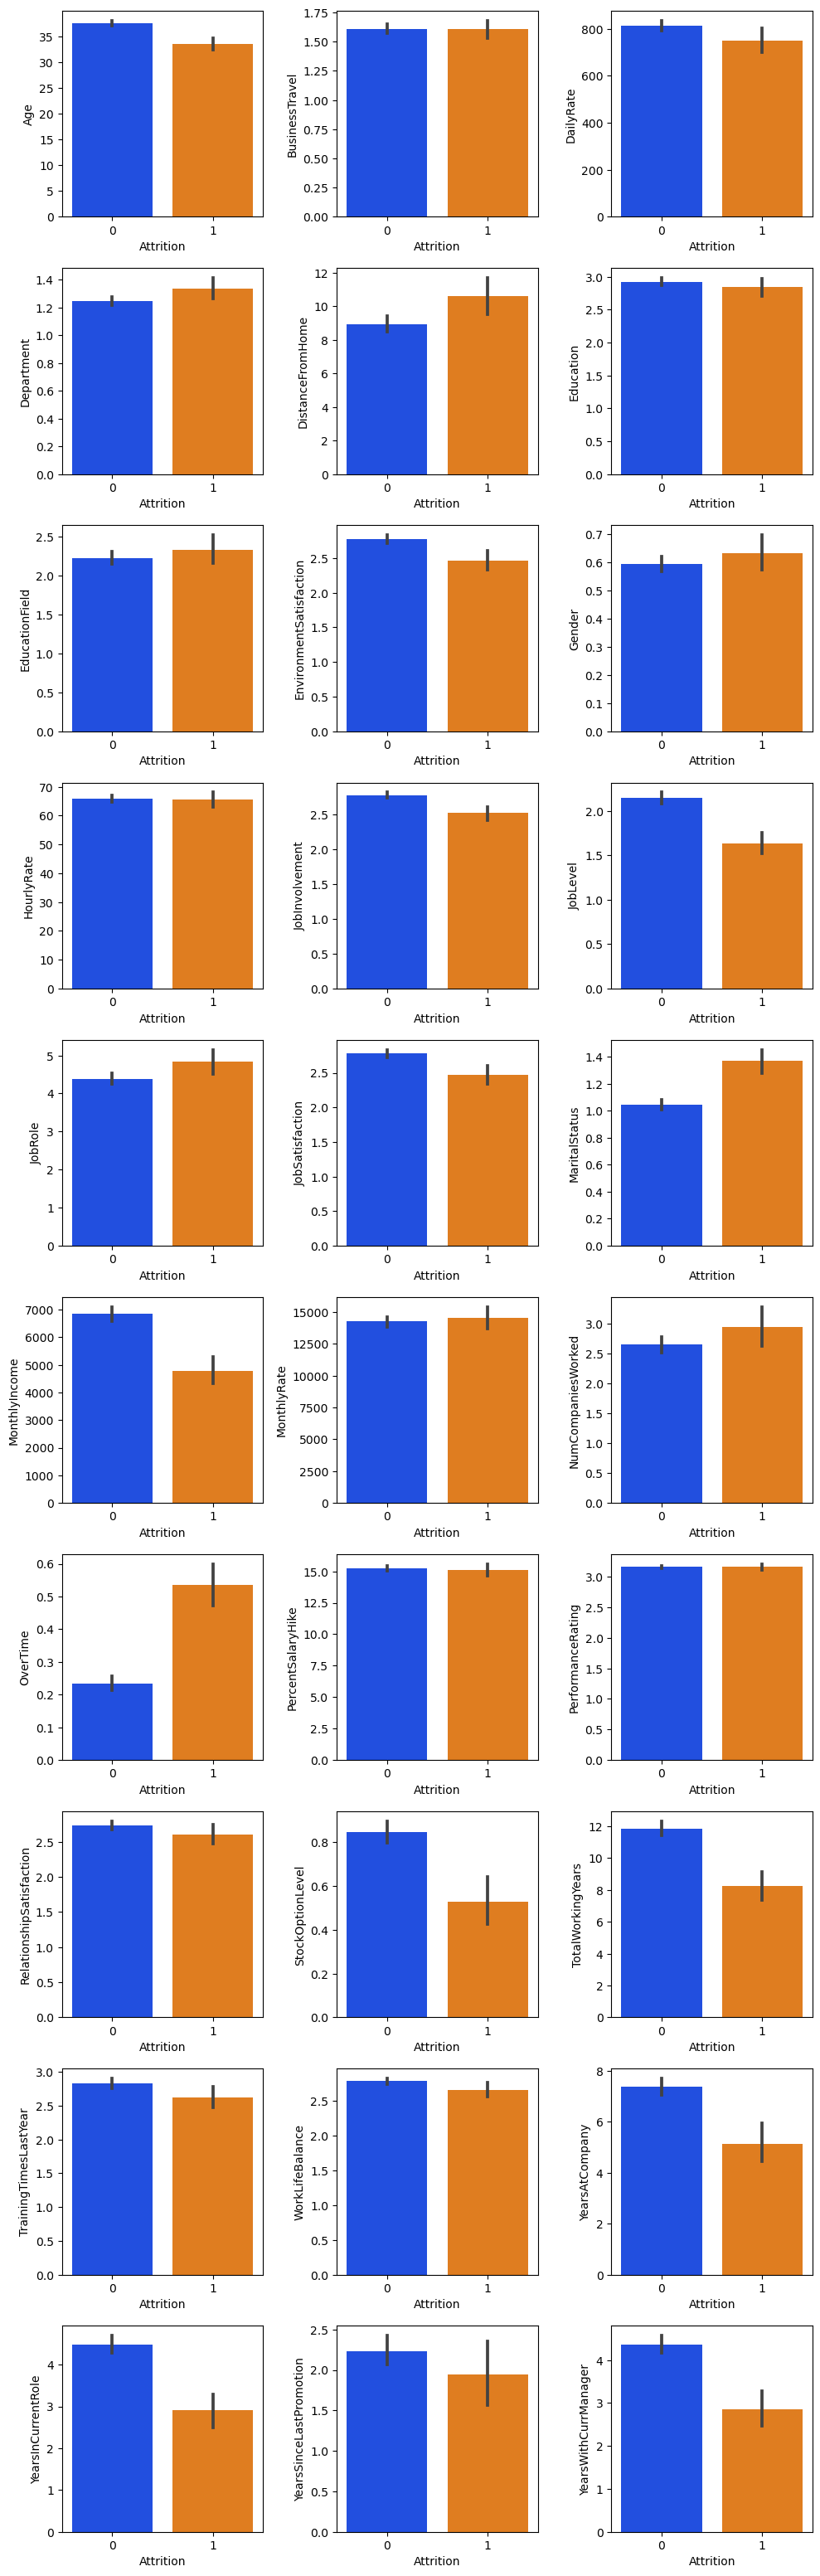

In [41]:
plt.figure(figsize = (10, 40))
p = 1
for i in HR_df.drop(['Attrition'], axis = 1):
    if p <= 31:
        ax = plt.subplot(13, 3, p)
        sns.barplot(x = 'Attrition', y = HR_df[i], data = HR_df, palette = 'bright')
       
    p = p + 1
plt.tight_layout()

## Check for Multicollinearity

## Data Correlation find - whether we need all 31 columns

In [42]:
# get coefficient of one variable with all the other variables

cor = HR_df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


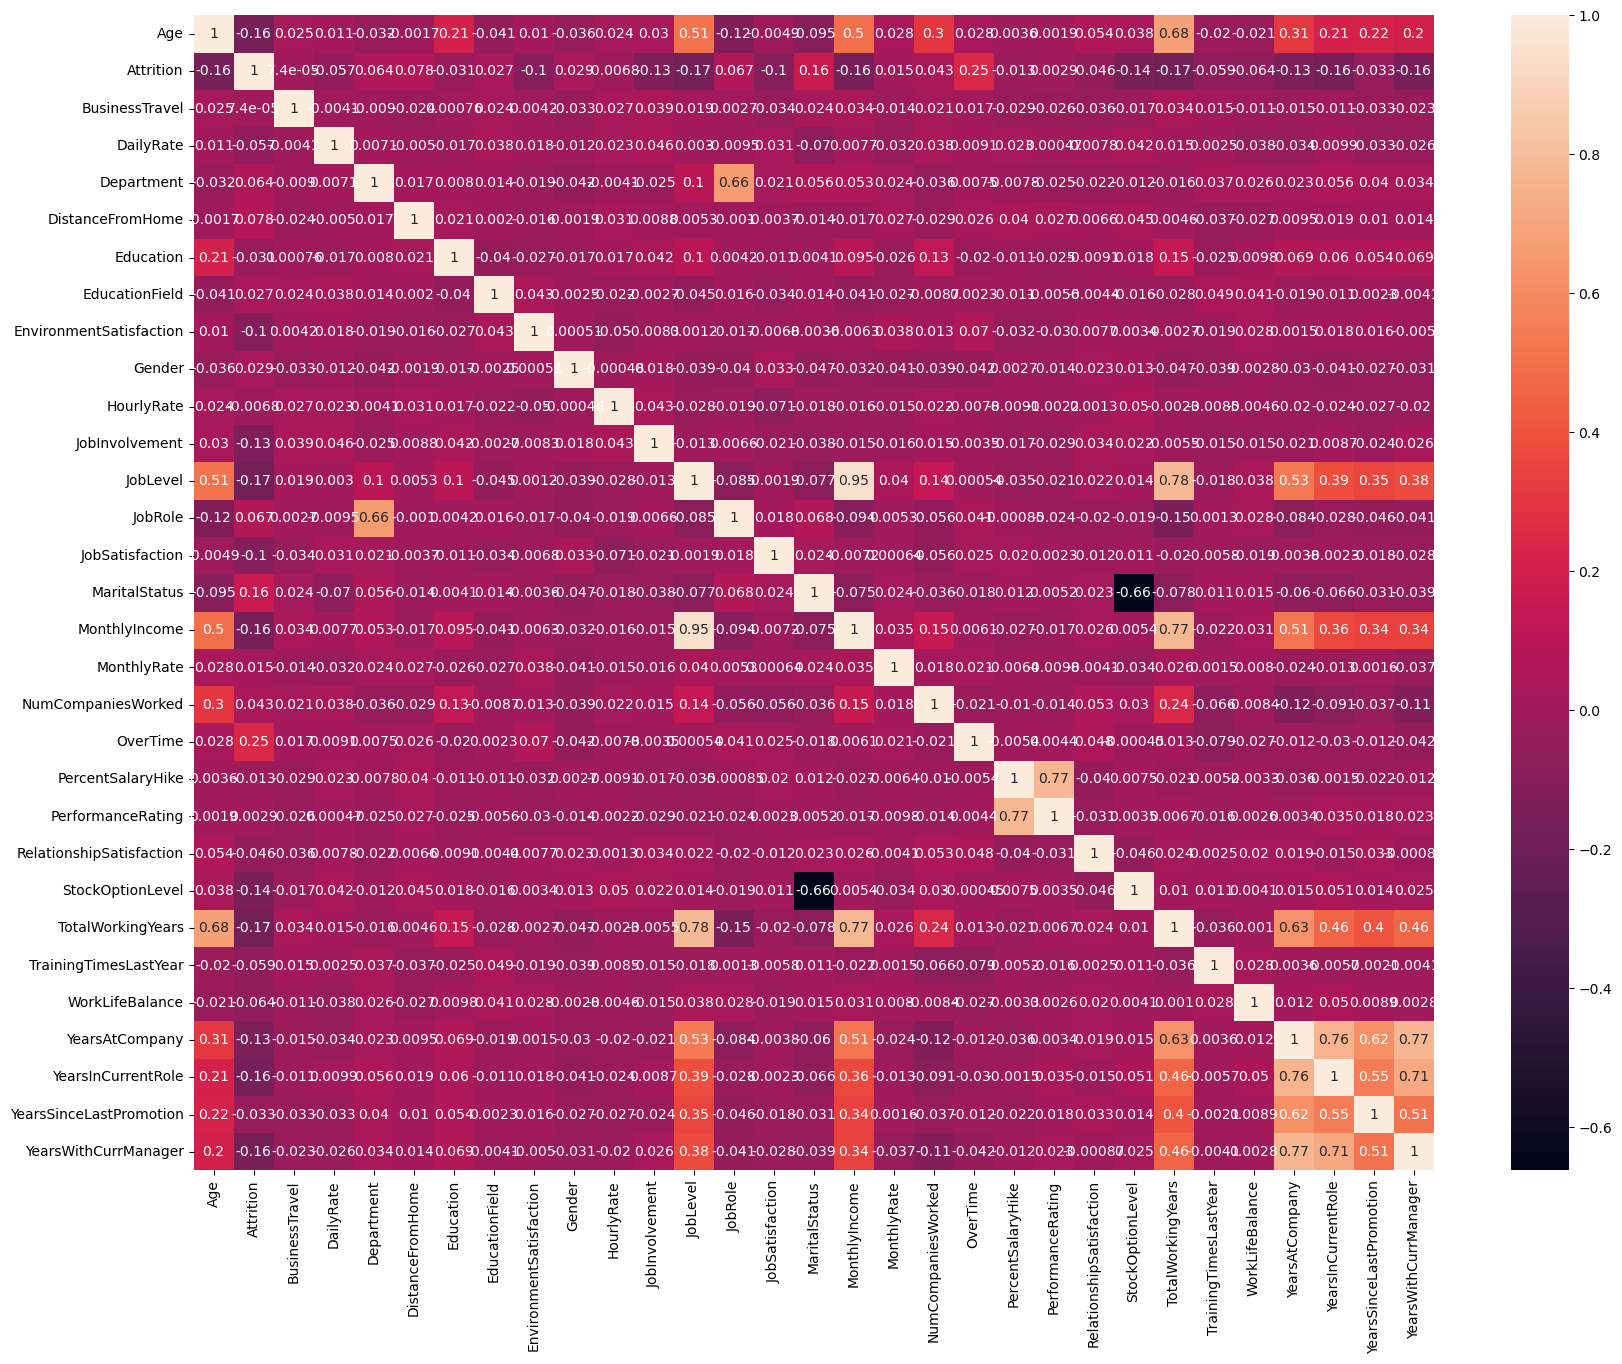

In [43]:
# visualize correlation using heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'YearsAtCompany' v/s 'YearsInCurrentRole' has positive 
               correlation 0.76. This shows there might be multicollinearity issue but we need one 
               more proof so will plot scatter plot and check

In [44]:
HR_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

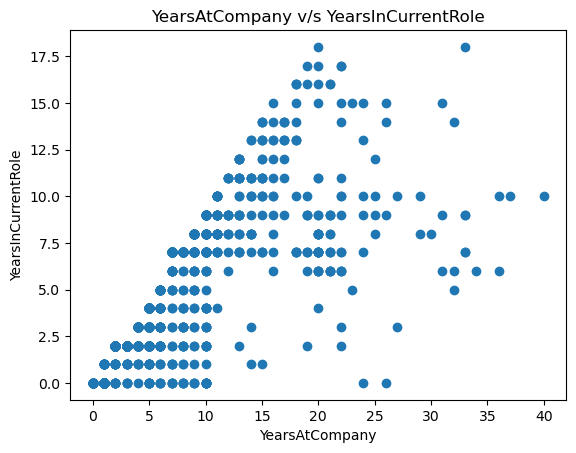

In [45]:
# one more proof so will plot scatter plot and check

plt.scatter(HR_df['YearsAtCompany'], HR_df['YearsInCurrentRole'])
plt.xlabel("YearsAtCompany")
plt.ylabel("YearsInCurrentRole")
plt.title("YearsAtCompany v/s YearsInCurrentRole")
plt.show()

In [ ]:
Observation:
            1. feature v/s feature - 'YearsAtCompany' v/s 'YearsInCurrentRole' from this scatter plot, we got to
               know that there is no multicollinearity issue between these two features

## Checking Outliers

In [46]:
# we dont check outliers for labels and categorocal column so remove it

HR_df_features = HR_df.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis = 1)

In [47]:
HR_df_features.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


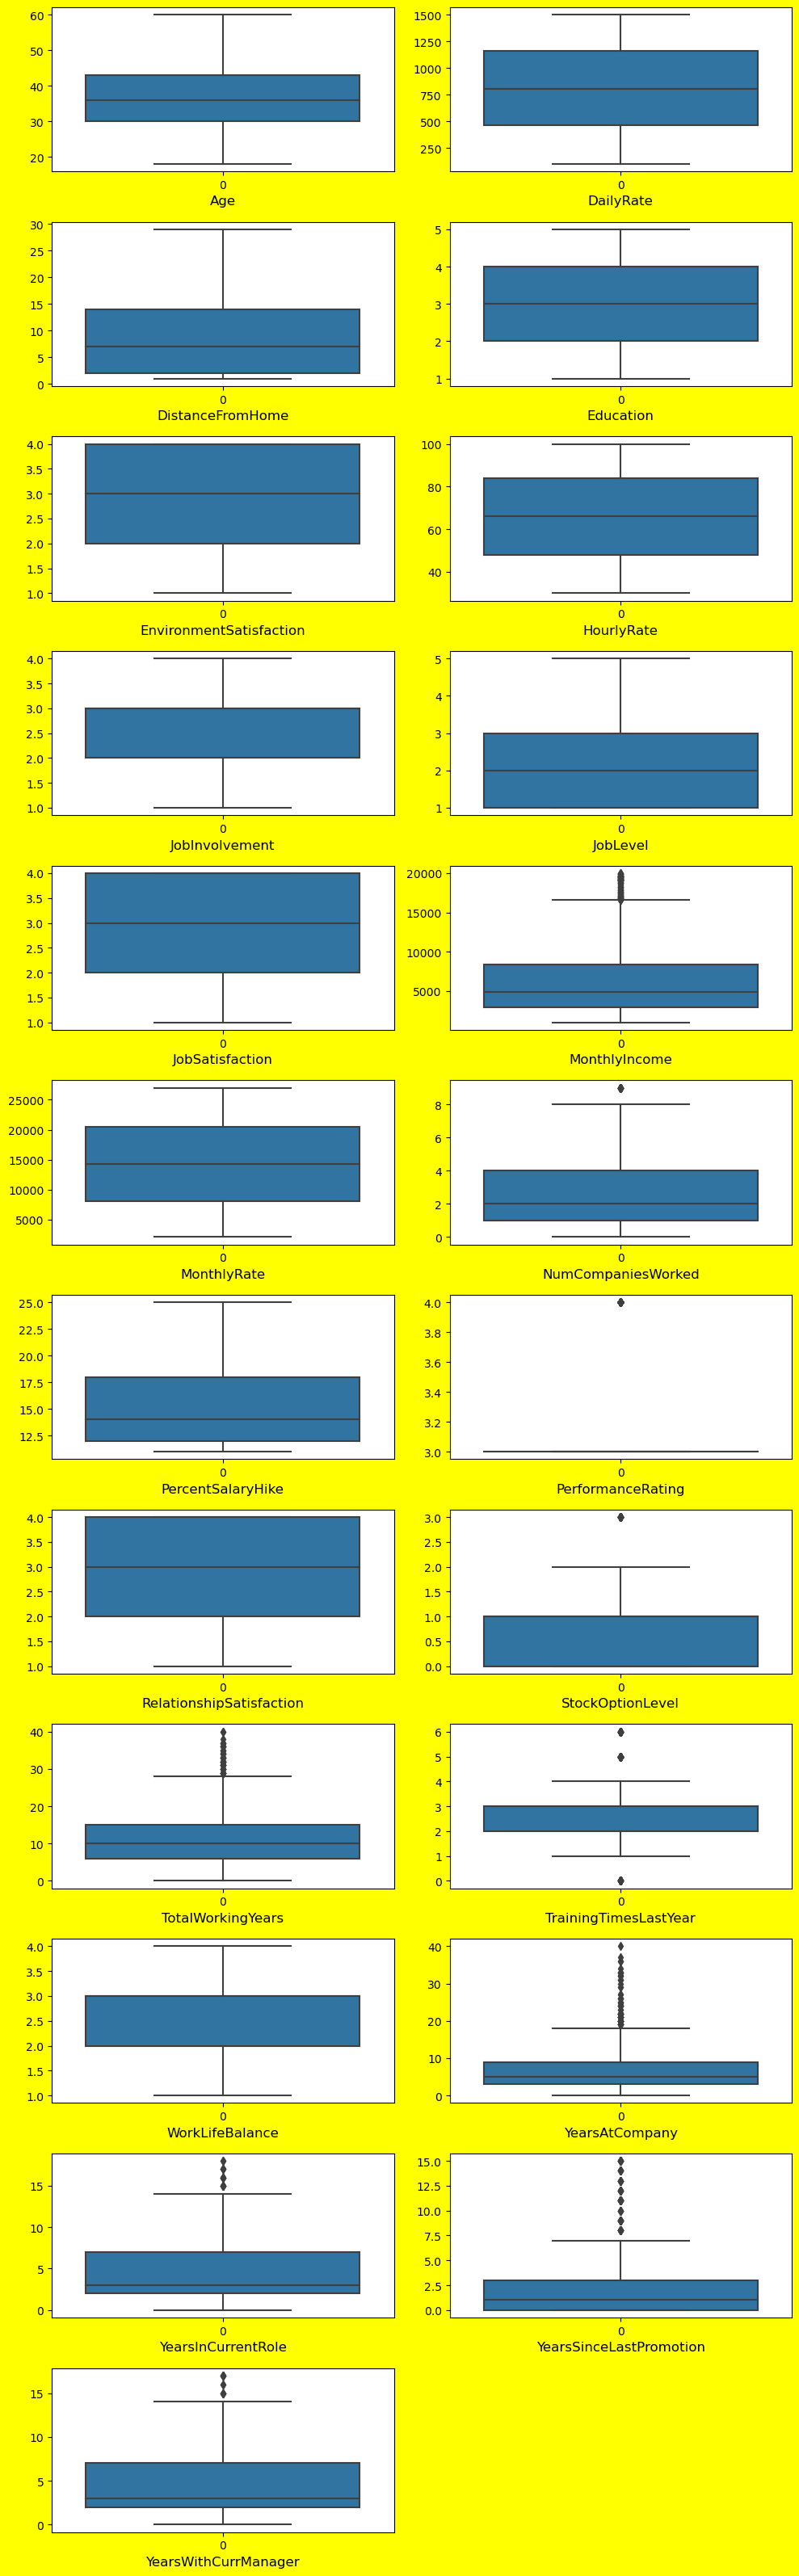

In [48]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,32), facecolor = 'yellow')
p = 1
for i in HR_df_features:
    if p <= 23:
        ax = plt.subplot(12, 2, p)
        sns.boxplot(data = HR_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations:
            1. More Outliers found in features - 'TotalWorkingYears', 'YearsAtCompany', 
              'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'. 
               Most of this outliers are right skewed (i.e. outliers are above max value)
            2. Remove the outliers

In [49]:
HR_df_features.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Find IQR to identify outliers and remove it

In [50]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = HR_df.quantile(0.25)
q3 = HR_df.quantile(0.75)
iqr = q3 - q1

In [51]:
# validating one outlier

TotalWorkingYears_high = (q3['TotalWorkingYears'] + (1.5 * iqr['TotalWorkingYears']))
TotalWorkingYears_high

# anything > 28.5 outliers

28.5

In [52]:
# check the index which have the higher values

np_index = np.where(HR_df['TotalWorkingYears'] > TotalWorkingYears_high)
np_index

# remove these indexes as they are outliers

(array([  18,   62,   85,   98,  105,  126,  187,  190,  233,  237,  270,
         379,  401,  408,  411,  424,  445,  473,  477,  534,  552,  561,
         588,  595,  616,  624,  627,  649,  653,  677,  714,  743,  749,
         760,  766,  774,  867,  890,  894,  914,  918,  956,  962,  966,
         971,  976, 1008, 1009, 1010, 1043, 1054, 1086, 1111, 1116, 1138,
        1181, 1184, 1194, 1264, 1301, 1331, 1374, 1401], dtype=int64),)

In [53]:
HR_df.shape

(1470, 31)

In [54]:
HR_df = HR_df.drop(HR_df.index[np_index])

In [55]:
HR_df.shape  # 63 rows removed - outliers

(1407, 31)

In [56]:
HR_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [57]:
HR_df.reset_index(inplace = True, drop = True)

In [58]:
HR_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1403,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1404,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1405,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
Observations:
            1. As we have less samples, we are not going to remove any outliers further

## Checking for Skewness

In [59]:
HR_df.skew() # not in the range -0.5 to +0.5

Age                         0.424557
Attrition                   1.808057
BusinessTravel             -1.427742
DailyRate                  -0.006883
Department                  0.182682
DistanceFromHome            0.954072
Education                  -0.284091
EducationField              0.549977
EnvironmentSatisfaction    -0.308070
Gender                     -0.420201
HourlyRate                 -0.031110
JobInvolvement             -0.514526
JobLevel                    1.121980
JobRole                    -0.382071
JobSatisfaction            -0.335164
MaritalStatus              -0.157704
MonthlyIncome               1.535079
MonthlyRate                 0.041924
NumCompaniesWorked          1.052487
OverTime                    0.973006
PercentSalaryHike           0.819869
PerformanceRating           1.924355
RelationshipSatisfaction   -0.290725
StockOptionLevel            0.957438
TotalWorkingYears           0.782774
TrainingTimesLastYear       0.578003
WorkLifeBalance            -0.558280
Y

In [60]:
# removing for skewness

HR_df['TotalWorkingYears'] = np.cbrt(HR_df['TotalWorkingYears'])

HR_df['YearsAtCompany'] = np.cbrt(HR_df['YearsAtCompany'])

HR_df['YearsInCurrentRole'] = np.cbrt(HR_df['YearsInCurrentRole'])

HR_df['YearsSinceLastPromotion'] = np.cbrt(HR_df['YearsSinceLastPromotion'])

HR_df['YearsWithCurrManager'] = np.cbrt(HR_df['YearsWithCurrManager'])

In [61]:
HR_df.skew() # not in the range -0.5 to +0.5

Age                         0.424557
Attrition                   1.808057
BusinessTravel             -1.427742
DailyRate                  -0.006883
Department                  0.182682
DistanceFromHome            0.954072
Education                  -0.284091
EducationField              0.549977
EnvironmentSatisfaction    -0.308070
Gender                     -0.420201
HourlyRate                 -0.031110
JobInvolvement             -0.514526
JobLevel                    1.121980
JobRole                    -0.382071
JobSatisfaction            -0.335164
MaritalStatus              -0.157704
MonthlyIncome               1.535079
MonthlyRate                 0.041924
NumCompaniesWorked          1.052487
OverTime                    0.973006
PercentSalaryHike           0.819869
PerformanceRating           1.924355
RelationshipSatisfaction   -0.290725
StockOptionLevel            0.957438
TotalWorkingYears          -0.661701
TrainingTimesLastYear       0.578003
WorkLifeBalance            -0.558280
Y

Observation: 
            1. There are still skewness in the data

## Seperating Features and Target

In [62]:
HR_df.shape

(1407, 31)

In [63]:
x = HR_df.drop(columns = ['Attrition'])
y = HR_df['Attrition']

In [64]:
x.shape

(1407, 30)

In [65]:
y.shape

(1407,)

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [66]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[ 0.55979624,  0.593247  ,  0.74233508, ...,  0.34638339,
        -1.0982494 ,  0.54972363],
       [ 1.48998024, -0.90800935, -1.29962821, ...,  0.81231194,
         0.22850081,  0.83562218],
       [ 0.09470423,  0.593247  ,  1.41471911, ..., -1.92565041,
        -1.0982494 , -1.85908163],
       ...,
       [-1.06802577,  0.593247  , -1.60728732, ..., -0.12233599,
        -1.0982494 ,  0.17258341],
       [ 1.48998024, -0.90800935,  0.54632646, ...,  0.67517904,
        -1.0982494 ,  0.9582741 ],
       [-0.25411477,  0.593247  , -0.43371668, ...,  0.1386293 ,
         0.22850081, -0.08425874]])

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.761246,Age
1,1.016205,BusinessTravel
2,1.021854,DailyRate
3,2.057103,Department
4,1.017817,DistanceFromHome
5,1.061323,Education
6,1.019675,EducationField
7,1.023852,EnvironmentSatisfaction
8,1.024766,Gender
9,1.024732,HourlyRate


In [ ]:
Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we can observe MonthlyIncome and JobLevel are > threshold value=5. 
               so there might be still multicollinearity problem.

## Modelling

In [68]:
HR_df.shape

(1407, 31)

In [69]:
x.shape

(1407, 30)

In [70]:
y.shape

(1407,)

## Data Imbalance use Oversampling method

In [71]:
y.value_counts()

0    1175
1     232
Name: Attrition, dtype: int64

Observation:
            1. '0' represents there are no gradual loss of employees overtime and '1' represents there 
                are gradual loss of employees overtime.
            2. Data is imbalanced so use Oversampling method

In [72]:
from imblearn.over_sampling import SMOTE

over_samp = SMOTE(random_state = 41, k_neighbors = 3, sampling_strategy = 0.75)
x1, y1 = over_samp.fit_resample(x, y)

In [73]:
y1.value_counts()

0    1175
1     881
Name: Attrition, dtype: int64

Observation:
            1. '0' represents there are no gradual loss of employees overtime and '1' represents there 
                are gradual loss of employees overtime.
            2. Now the data is balanced

In [74]:
x1.shape

(2056, 30)

In [75]:
y1.shape

(2056,)

In [76]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 41)

In [77]:
# Function to check accuracy of different models

def metric_score(clf, x_train, x_test, y_train, y_test, train = True):
    if train == True:
        y_pred = clf.predict(x_train)
        print("Train Result ")
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred) * 100 : .2f}%')
    elif train == False:
        pred = clf.predict(x_test)
        print("Test Result ")
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100 : .2f}%')
        print("Test Classification Report \n", classification_report(y_test, pred, digits = 2))

## Decision Tree Classifier

In [78]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [79]:
# This is the training score

metric_score(dt, x_train, x_test, y_train, y_test, train = True)

Train Result 
Accuracy Score:  100.00%


In [80]:
# This is the testing score

metric_score(dt, x_train, x_test, y_train, y_test, train = False)

Test Result 
Accuracy Score:  81.32%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       277
           1       0.80      0.79      0.80       237

    accuracy                           0.81       514
   macro avg       0.81      0.81      0.81       514
weighted avg       0.81      0.81      0.81       514



In [81]:
# to check the confusion matrix

y_pred1 = dt.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[230,  47],
       [ 49, 188]], dtype=int64)

## Random Tree Classifier

In [82]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

In [83]:
random_clf = RandomForestClassifier()
random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [84]:
# This is the training score

metric_score(random_clf, x_train, x_test, y_train, y_test, train = True)

Train Result 
Accuracy Score:  100.00%


In [85]:
# This is the testing score

metric_score(random_clf, x_train, x_test, y_train, y_test, train = False)

Test Result 
Accuracy Score:  91.44%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       277
           1       0.95      0.86      0.90       237

    accuracy                           0.91       514
   macro avg       0.92      0.91      0.91       514
weighted avg       0.92      0.91      0.91       514



In [86]:
# to check the confusion matrix

y_pred2 = random_clf.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[267,  10],
       [ 34, 203]], dtype=int64)

## Extra Tree Classifier

In [87]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train) 

ExtraTreesClassifier()

In [88]:
# This is the training score

metric_score(ETC, x_train, x_test, y_train, y_test, train = True)

Train Result 
Accuracy Score:  100.00%


In [89]:
# This is the testing score

metric_score(ETC, x_train, x_test, y_train, y_test, train = False)

Test Result 
Accuracy Score:  92.61%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       277
           1       0.95      0.89      0.92       237

    accuracy                           0.93       514
   macro avg       0.93      0.92      0.93       514
weighted avg       0.93      0.93      0.93       514



In [90]:
# to check the confusion matrix

y_pred3 = ETC.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[265,  12],
       [ 26, 211]], dtype=int64)

## Logistic Regression Classifier

In [91]:
s = StandardScaler()
x_scaled_1 = s.fit_transform(x1)
x_scaled_1

array([[ 0.6910575 ,  0.72781065,  0.83280648, ...,  0.48215469,
        -1.11517431,  0.68647602],
       [ 1.63747829, -0.79289941, -1.28881311, ...,  0.95603979,
         0.28379527,  0.97285734],
       [ 0.2178471 ,  0.72781065,  1.53141998, ..., -1.82867814,
        -1.11517431, -1.72639673],
       ...,
       [ 0.2178471 , -0.79289941, -1.11351526, ...,  0.00543109,
        -0.88544603,  0.27516678],
       [-0.1370607 , -0.79289941,  0.26051055, ...,  1.19748951,
         1.42555532,  0.9717556 ],
       [-0.84687629,  0.72781065, -0.53606351, ...,  0.19939727,
        -0.54597072, -0.67192459]])

In [92]:
# creating train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled_1, y1, test_size = 0.25, random_state = 41)

In [93]:
LR = LogisticRegression()
LR.fit(x_train1, y_train1) 

LogisticRegression()

In [94]:
# This is the training score

metric_score(LR, x_train1, x_test1, y_train1, y_test1, train = True)

Train Result 
Accuracy Score:  83.07%


In [95]:
# This is the testing score

metric_score(LR, x_train1, x_test1, y_train1, y_test1, train = False)

Test Result 
Accuracy Score:  80.35%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       277
           1       0.80      0.76      0.78       237

    accuracy                           0.80       514
   macro avg       0.80      0.80      0.80       514
weighted avg       0.80      0.80      0.80       514



In [96]:
# to check the confusion matrix

y_pred4 = ETC.predict(x_test)
cm4 = confusion_matrix(y_test1, y_pred4)
cm4

array([[265,  12],
       [ 26, 211]], dtype=int64)

## Cross Validation Score

In [97]:
cross_val_score(random_clf, x1, y1, cv = 5)

array([0.74029126, 0.9026764 , 0.93187348, 0.93673966, 0.96107056])

In [98]:
cross_val_score(random_clf, x1, y1, cv = 5).mean()

0.8964684761297332

In [99]:
cross_val_score(ETC, x1, y1, cv = 5)

array([0.77912621, 0.90754258, 0.94160584, 0.94403893, 0.96836983])

In [100]:
cross_val_score(ETC, x1, y1, cv = 5).mean() # no overfitting problem in ETC model

0.9066780053386246

In [114]:
cross_val_score(LR, x_scaled_1, y1, cv = 5)

array([0.71359223, 0.81265207, 0.83698297, 0.83454988, 0.83941606])

In [115]:
cross_val_score(LR, x_scaled_1, y1, cv = 5).mean() # no overfitting problem in LR model

0.8074386412491437

## HyperParameter Tuning for ETC model as its accuracy is better 92.61%

In [101]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'random_state': [10, 50, 100, 1000], 'max_depth': [0, 10, 20, 25],
             'n_jobs': [-3, -2, -1, 1], 'n_estimators': [25, 50, 100, 200, 300]}


In [102]:
GCD = GridSearchCV(ETC, parameters, cv = 5)

In [103]:
GCD.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 25],
                         'n_estimators': [25, 50, 100, 200, 300],
                         'n_jobs': [-3, -2, -1, 1],
                         'random_state': [10, 50, 100, 1000]})

In [104]:
GCD.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'n_estimators': 200,
 'n_jobs': -3,
 'random_state': 1000}

In [105]:
ETC_final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 25, n_jobs = -3, n_estimators = 200, random_state = 1000)

In [106]:
ETC_final_model.fit(x_train, y_train)


ExtraTreesClassifier(max_depth=25, n_estimators=200, n_jobs=-3,
                     random_state=1000)

In [107]:
ETC_pred = ETC_final_model.predict(x_test)
ETC_acc = accuracy_score(y_test, ETC_pred)

In [108]:
ETC_acc

0.9299610894941635

In [ ]:
Observation:
            1. ETC with hypertuning - testing acc -   92.99%
            2. ETC without hypertuning - testing acc - 92.02%
            3. We will choose ETC with hypertuning model for prediction

## Plotting ROC and compare AUC for all the models used

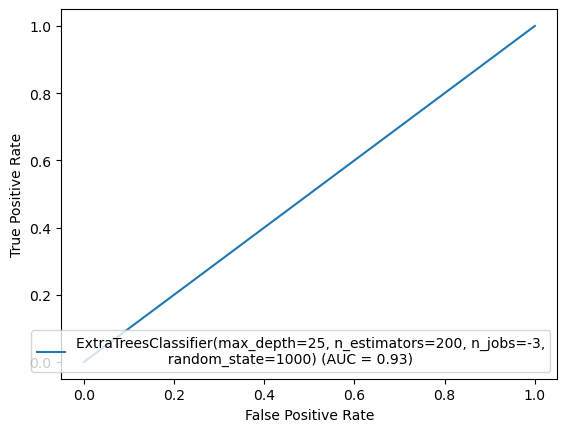

In [109]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, ETC_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = tpr, tpr = tpr, roc_auc = roc_auc, estimator_name = ETC_final_model)
display.plot()

## Save the Model

In [110]:
# use Extra Tree Classifier and the save the model as it has good testing accuracy

import pickle
pickle.dump(ETC_final_model, open('HR_Analytics_Model.pkl', 'wb'))

## prediction using the saved model

In [111]:
loaded_model = pickle.load(open('HR_Analytics_Model.pkl', 'rb'))
prediction_saved_model = loaded_model.predict(x_test)
prediction_saved_model

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [112]:
print(y_test)

1450    1
2014    1
365     0
1544    1
1152    0
       ..
261     0
2050    1
1856    1
345     0
1537    1
Name: Attrition, Length: 514, dtype: int32


In [113]:
# comparing the predicted and actual values

a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = prediction_saved_model
df1['Original'] = a
df1

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
509,0,0
510,1,1
511,1,1
512,0,0


Observation:
            1. Almost all actual and predicted values match
            2. This HR_Analytics_Model.pkl can be used to find attrition (i.e. the gradual loss of 
                employees overtime)

Observation:
            1. Decision Tree Classifier - testing accuracy                    - 81.32%
            2. Random Forest Classifier - testing accuracy                    - 91.44%
            3. Extra Tree Classifier without hypertuning - testing accuracy   - 92.61%
            4. Extra Tree Classifier with hypertuning - testing accuracy      - 92.99%
            4. Logistic Regression Classifier - testing accuracy              - 80.35%
            5. Comparing all the Classifiers - Extra Tree Classifier with hypertuning has the
               good accuracy and our model is also free from overfitting/underfitting problem